##1: Import the libraries

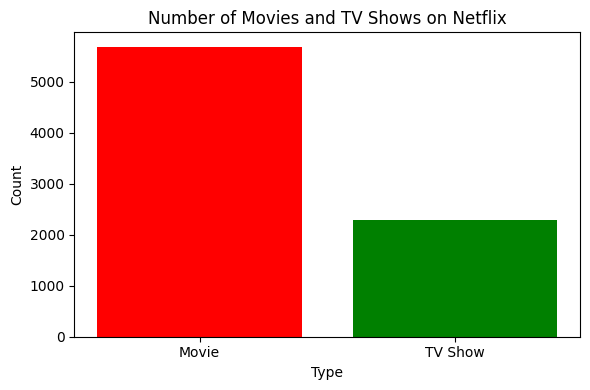

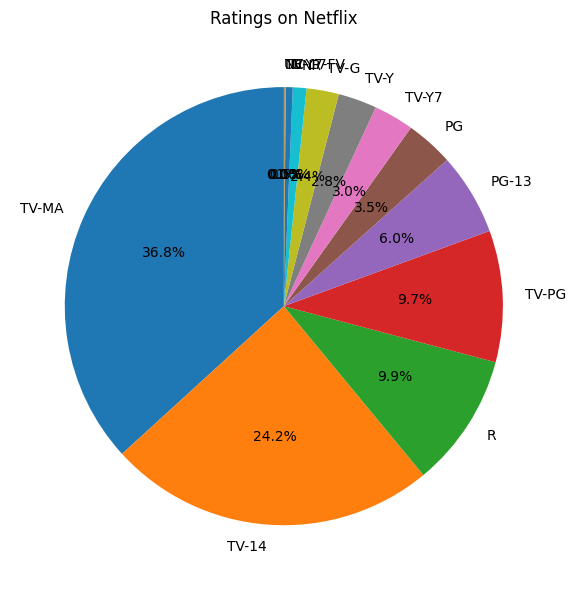

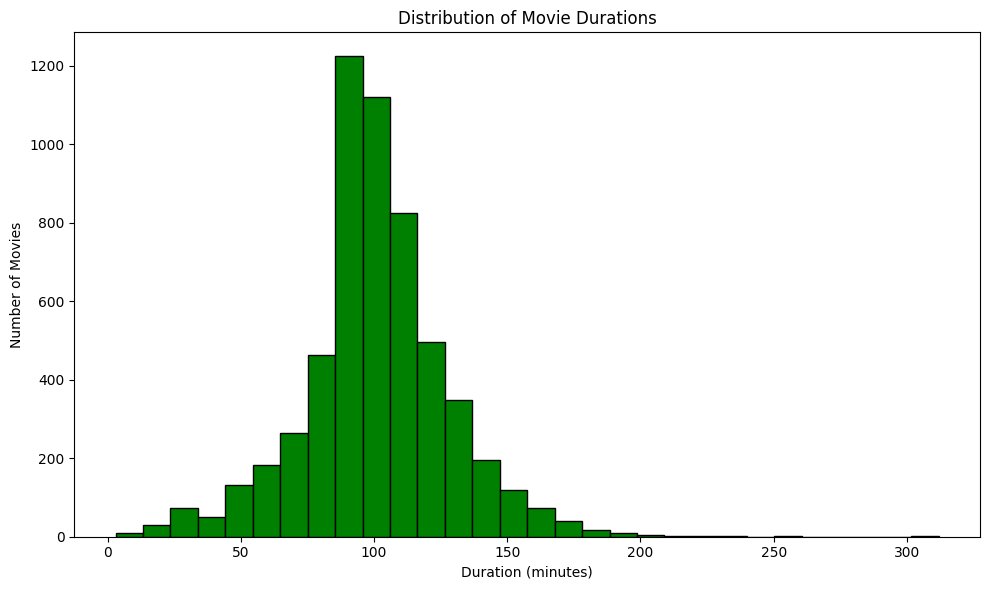

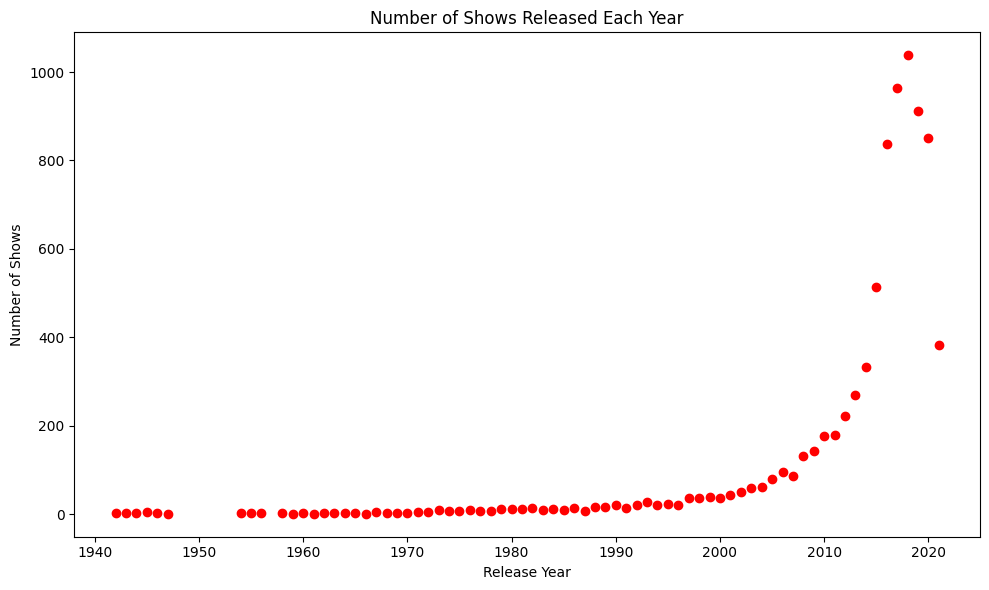

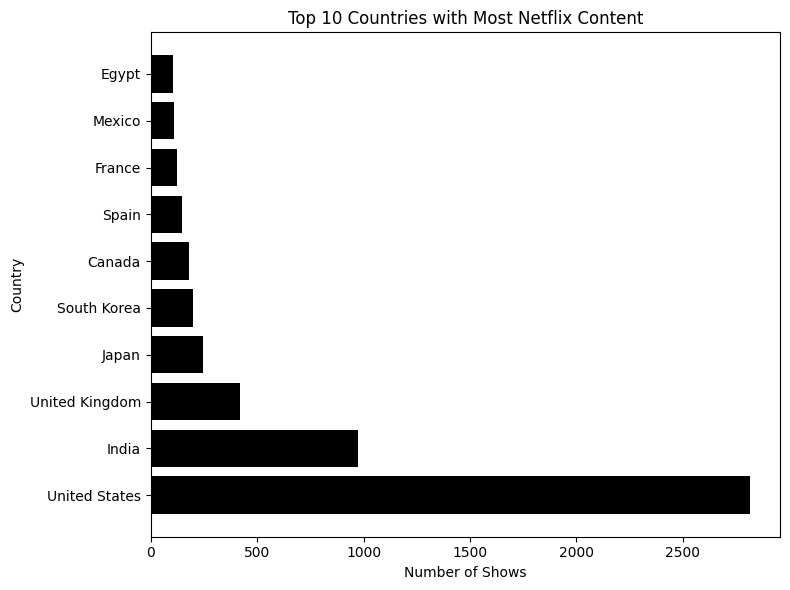

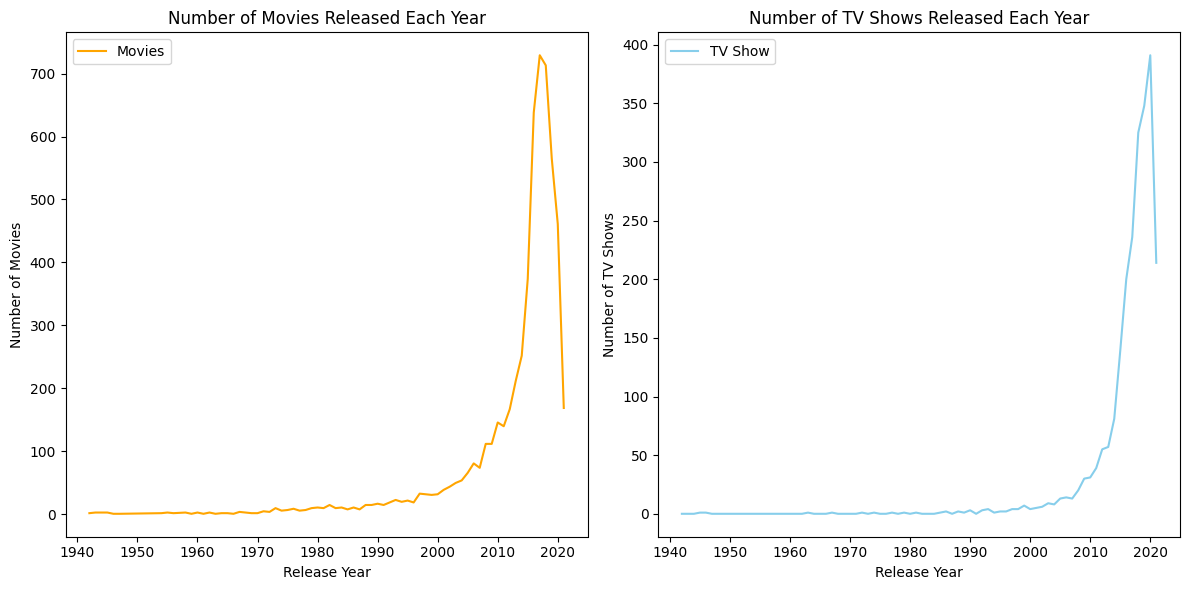

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv('netflix_titles.csv')
df = df.dropna(subset=['type', 'country', 'release_year', 'rating', 'duration'])

#Bar Graph
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['red', 'green'])
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_TVshows.png')
plt.show()





#piechart
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Ratings on Netflix')
plt.tight_layout()
plt.savefig('content_Ratings_Pie.png')
plt.show()



#Histogram
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
plt.hist(movie_df['duration_int'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_durations_histogram.png')
plt.show()


#Scatter plot
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red', marker='o')
plt.title('Number of Shows Released Each Year')
plt.xlabel('Release Year')  
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('shows_released_each_year.png')
plt.show()


#Horizontal Bar Graph
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values, color='black')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top10_contries.png')
plt.show()


content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# first subplot for Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], label='Movies', color='orange')
ax[0].set_title('Number of Movies Released Each Year')
ax[0].set_xlabel('Release Year')    
ax[0].set_ylabel('Number of Movies')
ax[0].legend()

# second subplot for TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], label='TV Show', color='skyblue')
ax[1].set_title('Number of TV Shows Released Each Year')
ax[1].set_xlabel('Release Year')    
ax[1].set_ylabel('Number of TV Shows')
ax[1].legend()
plt.tight_layout()
plt.savefig('movies_vs_TVshows_by_year.png')
plt.show()
